In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import math
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

In [276]:
# IF USING KAGGLE
# pip install kaggle
# import kaggle
# kaggle datasets download -d redwankarimsony/heart-disease-data

In [277]:
df = pd.read_csv('datasets/heart_disease_uci.csv')

In [278]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [325]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [280]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [281]:
df.loc[(df['sex'] == '?') | (df['sex'] == 'Male')]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [282]:
X = df.drop('num', axis=1) 

In [283]:
Y = df['num']

In [284]:
X

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
Y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

## One Hot Encoding the Categorical Features
### Sci Kit Learn does not support categorical data. In order to use categorical data we have to One Hot Encode the categorical variables.  

In [286]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [287]:
df['sex'].isnull().sum()

0

In [288]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [289]:
# from sklearn.impute import SimpleImputer
# 
# si = SimpleImputer()
# X = si.fit_transform(X[['trestbps']])

In [290]:
df['trestbps'].isnull().sum()

59

In [291]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [292]:
X['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [293]:
df.loc[(df['dataset'] == 'Switzerland')]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,70,Male,Switzerland,asymptomatic,115.0,0.0,False,st-t abnormality,92.0,True,0.0,flat,NaN,reversable defect,1
716,717,70,Male,Switzerland,asymptomatic,140.0,0.0,True,normal,157.0,True,2.0,flat,NaN,reversable defect,3
717,718,72,Male,Switzerland,non-anginal,160.0,0.0,NaN,lv hypertrophy,114.0,False,1.6,flat,2.0,NaN,0
718,719,73,Female,Switzerland,non-anginal,160.0,0.0,False,st-t abnormality,121.0,False,0.0,upsloping,NaN,normal,1


In [294]:
len(X)

920

In [295]:
X

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

transformer = ColumnTransformer(transformers=[
    ('tNumerical',SimpleImputer(),['id','age', 'trestbps', 'chol', 'thalch', 'oldpeak']),
    ('tCategorical',OneHotEncoder(sparse=False, drop='first'),
     ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca'])
], remainder='passthrough')

In [324]:
X_encoded = transformer.fit_transform(X)

ValueError: A given column is not a column of the dataframe

In [298]:
X_encoded

array([[  1.        ,  63.        , 145.        , ...,   0.        ,
          0.        ,   0.        ],
       [  2.        ,  67.        , 160.        , ...,   0.        ,
          1.        ,   0.        ],
       [  3.        ,  67.        , 120.        , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [918.        ,  55.        , 122.        , ...,   0.        ,
          0.        ,   1.        ],
       [919.        ,  58.        , 132.13240418, ...,   0.        ,
          0.        ,   1.        ],
       [920.        ,  62.        , 120.        , ...,   0.        ,
          0.        ,   1.        ]])

In [299]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [300]:
len(X_encoded[919,0:27])

27

In [301]:
np.isnan(X_encoded[919,15]) 

False

In [302]:
m, n = X_encoded.shape

In [303]:
m

920

In [304]:
n

30

In [305]:
def check_transformation(x):
    m, n = x.shape
    count=0
    for i in range(m):
        for j in range(n):
            if np.isnan(x[i, j]):
                count=count+1
    return count

In [306]:
check_transformation(X_encoded)

0

In [307]:
# X_encoded_2 = transformer.transform(X)

In [308]:
# Y = Y.to_numpy()

# Build a Preliminary Classification Tree

In [314]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42)

In [315]:
dt = DecisionTreeClassifier(random_state=42)

In [316]:
dt = dt.fit(X_train, Y_train)

In [322]:
Y_train

695    3
521    1
7      0
250    0
155    1
      ..
106    2
270    1
860    0
435    0
102    0
Name: num, Length: 690, dtype: int64

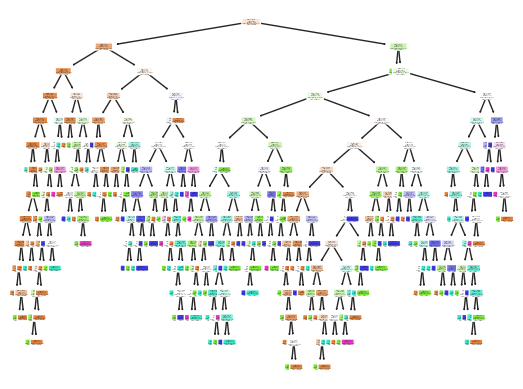

In [333]:
plot_tree(dt, 
          filled=True, 
          rounded=True,
          class_names=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4']
          ); 

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


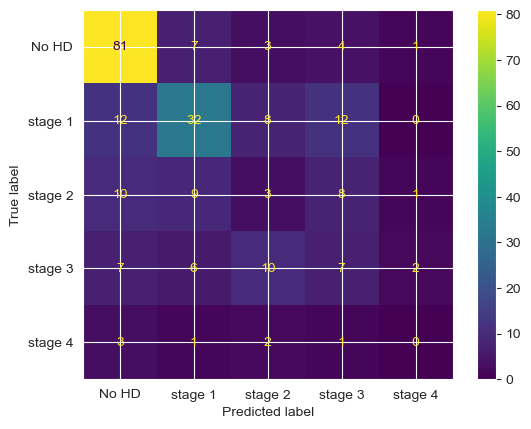

In [334]:
plot_confusion_matrix(dt, X_test, Y_test, display_labels=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4'])

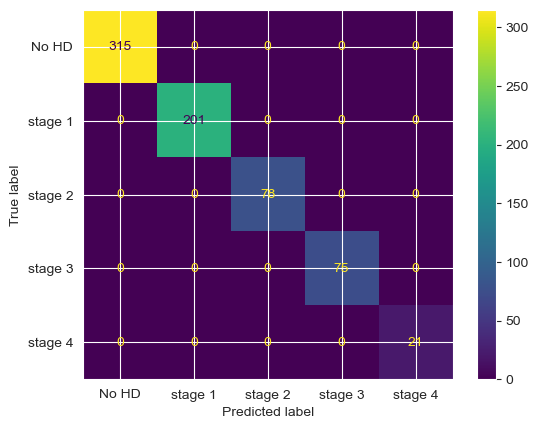

In [337]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt, X_train, Y_train, display_labels=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4'])

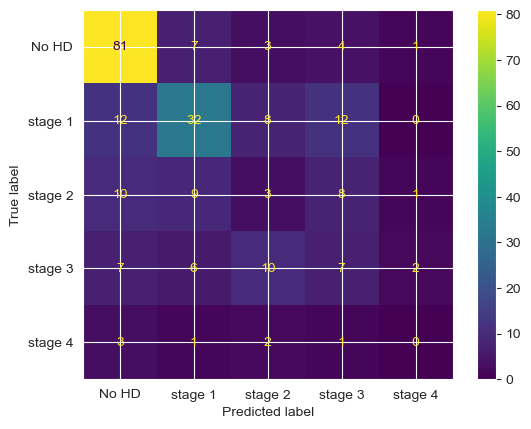

In [338]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, Y_test, display_labels=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4'])

# Cost Complexity Pruning: Visualize alpha

In [342]:
path = dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

dts = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, Y_train)
    dts.append(dt)

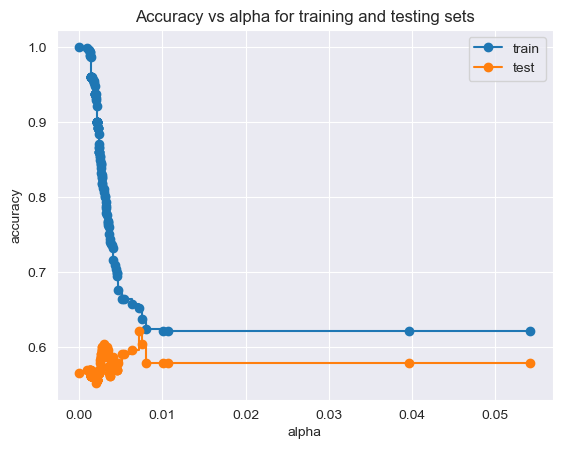

In [344]:
train_scores = [dt.score(X_train, Y_train) for dt in dts]
test_scores = [dt.score(X_test, Y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

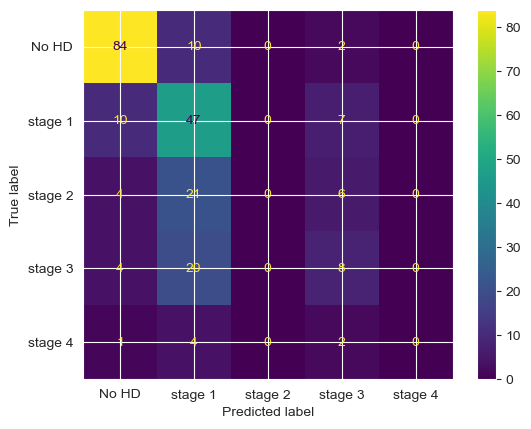

In [346]:
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=.008)

dt_pruned = dt_pruned.fit(X_train, Y_train)

ConfusionMatrixDisplay.from_estimator(dt_pruned, X_test, Y_test, display_labels=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4'])


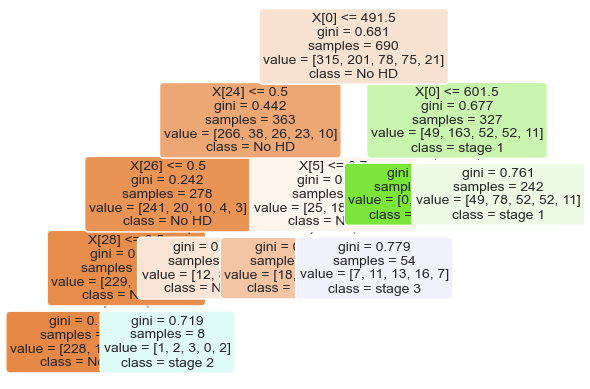

In [349]:
plot_tree(dt_pruned,
          filled=True,
          rounded=True,
          class_names=['No HD','stage 1', 'stage 2', 'stage 3', 'stage 4'], 
          fontsize=10
          );